<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Bladder_Cancer_(BLCA)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
significant_genes_report_corrected.csv	 TCGA.BLCA.sampleMap_HiSeqV2_PANCAN.gz
TCGA.BLCA.sampleMap_BLCA_clinicalMatrix


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.BLCA.sampleMap_BLCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.BLCA.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)


In [4]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_BLCA,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_BLCA,_PANCAN_mutation_PANCAN,...,_GENOMIC_ID_data/public/TCGA/BLCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_BLCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_BLCA_miRNA_GA,_GENOMIC_ID_TCGA_BLCA_hMethyl450,_GENOMIC_ID_TCGA_BLCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_BLCA_gistic2
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,TCGA-2F-A9KO-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,689c1593-3903-4c82-9cb1-1471d8bca178,689c1593-3903-4c82-9cb1-1471d8bca178,689c1593-3903-4c82-9cb1-1471d8bca178,689c1593-3903-4c82-9cb1-1471d8bca178,TCGA-2F-A9KO-01,NaN,TCGA-2F-A9KO-01A-11D-A38H-05,TCGA-2F-A9KO-01A-11D-A38G-08,TCGA-2F-A9KO-01A-11D-A38F-01
TCGA-2F-A9KP-01,TCGA-2F-A9KP-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,TCGA-2F-A9KP-01,NaN,TCGA-2F-A9KP-01A-11D-A38H-05,TCGA-2F-A9KP-01A-11D-A38G-08,TCGA-2F-A9KP-01A-11D-A38F-01
TCGA-2F-A9KQ-01,TCGA-2F-A9KQ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,TCGA-2F-A9KQ-01,NaN,TCGA-2F-A9KQ-01A-11D-A38H-05,TCGA-2F-A9KQ-01A-11D-A38G-08,TCGA-2F-A9KQ-01A-11D-A38F-01
TCGA-2F-A9KR-01,TCGA-2F-A9KR-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,a9321523-588e-40f2-95d2-2501fd1b23ee,a9321523-588e-40f2-95d2-2501fd1b23ee,a9321523-588e-40f2-95d2-2501fd1b23ee,a9321523-588e-40f2-95d2-2501fd1b23ee,TCGA-2F-A9KR-01,NaN,TCGA-2F-A9KR-01A-11D-A38H-05,TCGA-2F-A9KR-01A-11D-A38G-08,TCGA-2F-A9KR-01A-11D-A38F-01
TCGA-2F-A9KT-01,TCGA-2F-A9KT-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,406a8f7c-1530-4ecf-95b0-b051d9a3184d,406a8f7c-1530-4ecf-95b0-b051d9a3184d,406a8f7c-1530-4ecf-95b0-b051d9a3184d,406a8f7c-1530-4ecf-95b0-b051d9a3184d,TCGA-2F-A9KT-01,NaN,TCGA-2F-A9KT-01A-11D-A38H-05,TCGA-2F-A9KT-01A-11D-A38G-08,TCGA-2F-A9KT-01A-11D-A38F-01


In [5]:
# Display gene dataset
gene_data.head()

,TCGA-BT-A20R-11,TCGA-DK-AA6S-01,TCGA-DK-A6B2-01,TCGA-GU-A763-01,TCGA-XF-A9T4-01,TCGA-FD-A5C1-01,TCGA-GU-A42Q-01,TCGA-DK-A3IL-01,TCGA-XF-AAMH-01,TCGA-FT-A61P-01,...,TCGA-FD-A6TK-01,TCGA-UY-A8OB-01,TCGA-DK-A3IQ-01,TCGA-FD-A6TG-01,TCGA-KQ-A41S-01,TCGA-LC-A66R-01,TCGA-GC-A3BM-11,TCGA-BL-A13I-01,TCGA-FD-A3SO-01,TCGA-BT-A2LD-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.353192,0.343208,1.157308,1.521308,0.027308,-0.625392,-1.840092,1.512608,-0.534692,-0.330392,...,-0.054692,-1.318392,0.804608,1.384708,0.784808,0.667308,0.321108,0.107908,-0.736392,-0.352592
HIF3A,4.357274,-0.861026,-1.885126,-2.130026,-3.980026,-3.192626,-1.327826,0.652374,-1.000826,0.729274,...,-1.011226,-4.038626,1.882474,2.094574,1.465774,-2.788026,2.545374,-4.166226,-2.800426,-0.804026
RNF17,-0.050035,-0.531035,1.098365,-0.531035,-0.531035,3.215665,1.265265,1.918465,-0.531035,-0.531035,...,-0.531035,-0.531035,1.078365,-0.531035,-0.531035,0.762565,0.181565,-0.531035,-0.002835,-0.531035
RNF10,0.416928,0.185128,0.236528,0.400028,-0.019172,-0.197372,0.064128,0.546028,-0.039572,-0.144372,...,0.285828,0.266028,0.268928,0.501528,-0.052172,-0.077972,-0.176172,0.047028,-0.493672,-0.504272
RNF11,1.325922,-0.550578,-0.192178,-1.133178,0.422622,0.222722,-0.150278,-0.495278,-0.721878,-0.406278,...,-0.076178,-0.703478,0.044522,0.448122,-0.021978,-1.169078,0.693322,-0.831878,-0.314878,-0.199478


In [6]:
# Set Basic info

trait = 'Bladder Cancer'
condition = 'Inflammation'
condition_col = 'EGFR'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')


The clinical dataset has 129 features, and the gene dataset includes 20530 genes


In [7]:

# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_BLCA,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_BLCA,_PANCAN_mutation_PANCAN,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,TCGA-2F-A9KO-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.086078,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488
TCGA-2F-A9KP-01,TCGA-2F-A9KP-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124822,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612
TCGA-2F-A9KQ-01,TCGA-2F-A9KQ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188
TCGA-2F-A9KR-01,TCGA-2F-A9KR-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.214422,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112
TCGA-2F-A9KT-01,TCGA-2F-A9KT-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088


In [8]:

# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,EGFR,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,-1.094227,0.221008,4.428374,-0.531035,0.720328,-0.408078,-0.39141,0.048706,-0.977746,0.239401,...,-0.086078,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488
TCGA-2F-A9KP-01,0.778373,1.334508,-2.541326,-0.531035,0.490728,0.523922,-0.59311,0.178806,-2.848746,-0.423399,...,0.124822,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612
TCGA-2F-A9KQ-01,0.347773,1.173308,-5.554726,-0.531035,1.647728,0.518622,0.02829,0.800406,-1.767946,0.126101,...,-0.748878,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188
TCGA-2F-A9KR-01,0.354673,1.090208,0.971574,-0.531035,0.256228,0.586622,-0.73021,0.636006,-1.863846,0.539901,...,0.214422,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112
TCGA-2F-A9KT-01,0.635173,0.955008,-1.481926,0.115365,-0.039972,0.746322,-0.59151,0.365906,-0.398046,-0.423399,...,-0.748878,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,EGFR,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bladder Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,-1.094227,0.221008,4.428374,-0.531035,0.720328,-0.408078,-0.39141,0.048706,-0.977746,0.239401,...,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488,1
TCGA-2F-A9KP-01,0.778373,1.334508,-2.541326,-0.531035,0.490728,0.523922,-0.59311,0.178806,-2.848746,-0.423399,...,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612,1
TCGA-2F-A9KQ-01,0.347773,1.173308,-5.554726,-0.531035,1.647728,0.518622,0.02829,0.800406,-1.767946,0.126101,...,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188,1
TCGA-2F-A9KR-01,0.354673,1.090208,0.971574,-0.531035,0.256228,0.586622,-0.73021,0.636006,-1.863846,0.539901,...,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112,1
TCGA-2F-A9KT-01,0.635173,0.955008,-1.481926,0.115365,-0.039972,0.746322,-0.59151,0.365906,-0.398046,-0.423399,...,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088,1


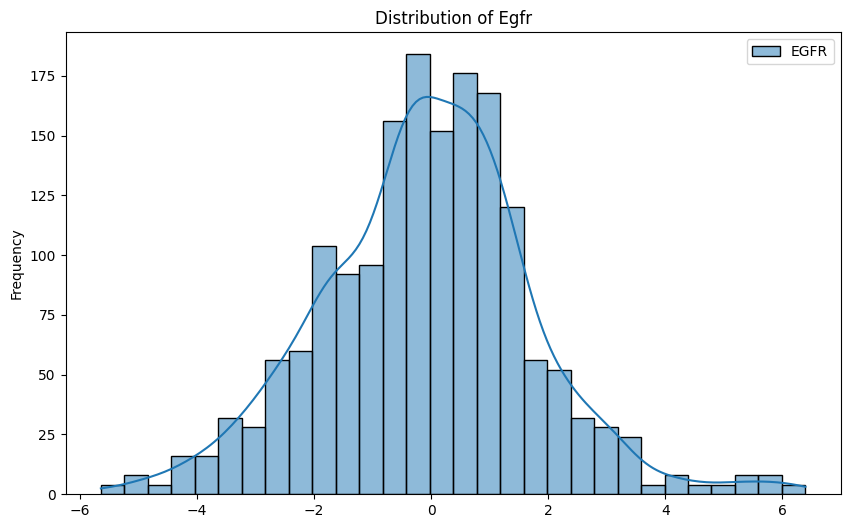

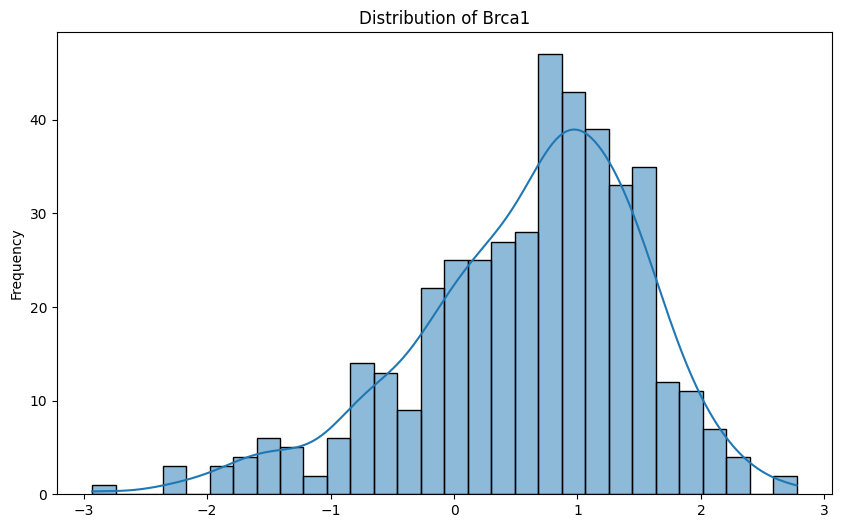

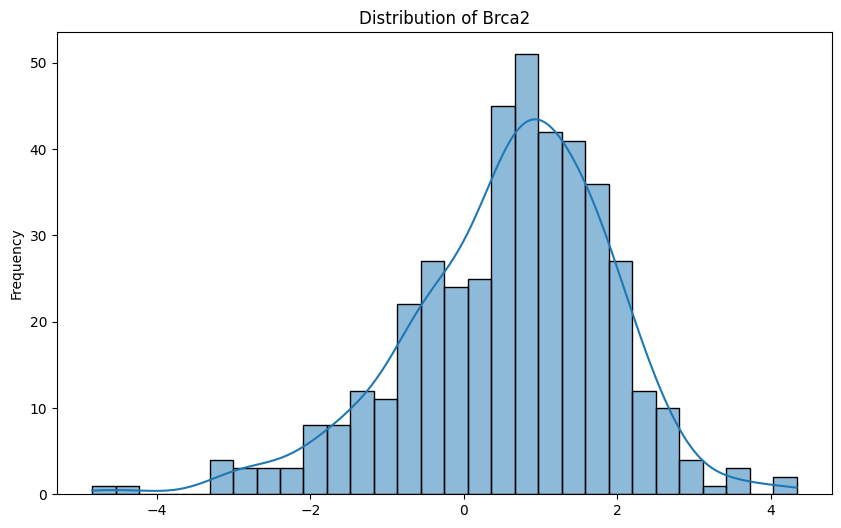

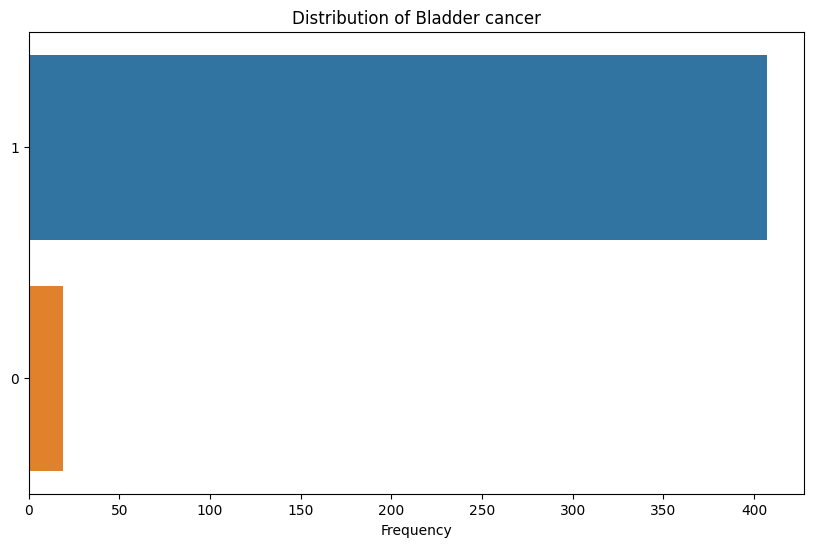

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [11]:
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,Inflammation,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bladder Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,-1.094227,0.221008,4.428374,-0.531035,0.720328,-0.408078,-0.39141,0.048706,-0.977746,0.239401,...,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488,1
TCGA-2F-A9KP-01,0.778373,1.334508,-2.541326,-0.531035,0.490728,0.523922,-0.59311,0.178806,-2.848746,-0.423399,...,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612,1
TCGA-2F-A9KQ-01,0.347773,1.173308,-5.554726,-0.531035,1.647728,0.518622,0.02829,0.800406,-1.767946,0.126101,...,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188,1
TCGA-2F-A9KR-01,0.354673,1.090208,0.971574,-0.531035,0.256228,0.586622,-0.73021,0.636006,-1.863846,0.539901,...,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112,1
TCGA-2F-A9KT-01,0.635173,0.955008,-1.481926,0.115365,-0.039972,0.746322,-0.59151,0.365906,-0.398046,-0.423399,...,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088,1


In [12]:

import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train


The cross-validation accuracy is 88.58% ± 5.04%


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [15]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: Inflammation
Coefficient: -0.0046
p-value: 0.691



In [16]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)


Genes with corrected p-value < 0.05, affecting the trait Bladder Cancer conditional on the factor Inflammation, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
    SNORA35    -0.477700      6.646290e-286
    DEFB112    -0.477700      6.646290e-286
  KRTAP22-1    -0.477700      6.646290e-286
     SNAR-D    -0.477700      6.646290e-286
        NPS    -0.477700      6.646290e-286
   DEFB108B     0.477700      6.646290e-286
      OR5L2     0.477700      6.646290e-286
    SNORD46    -0.477700      6.646290e-286
    TMEM225    -0.477700      6.646290e-286
  KRTAP25-1    -0.477700      6.646290e-286
     TTTY12     0.477700      6.646290e-286
      BSPH1    -0.477700      6.646290e-286
     TTTY21     0.477700      6.646290e-286
    DEFB114     0.477700      6.646290e-286
     OR4F17     0.477700      6.646290e-286
   SNORA36C    -0.477700      6.646290e-286
     SNORD9    -0.477700      6.646290e-286
       PRM3    -0.477700      6.646290e-286
     SNAR-H    -0.47770